문제: 헬스 트래킹 앱 사용자 데이터 분석 및 시각화 (산점도 활용) 🏋️‍♂️📊
당신은 한 헬스 트래킹 애플리케이션의 데이터 분석가입니다. fitness_user_data.csv 파일에는 사용자 ID, 운동 시간(분), 소모 칼로리, 몸무게(kg), 운동 유형, 운동한 날짜 등의 정보가 포함되어 있습니다. 하지만 데이터에는 결측값, 이상치, 날짜 형식 문제가 있으며, 이를 정리하여 산점도(scatter plot)를 사용해 분석해야 합니다.
데이터 로드 및 기본 탐색 
fitness_user_data.csv 파일을 pandas를 사용하여 로드하세요.
데이터의 기본 정보(info()), 처음 5개 행(head()), 결측값 현황(isnull().sum())을 확인하세요.
데이터 전처리
(1) 결측값 처리
exercise_time (운동 시간, 분)의 결측값은 평균값으로 채우세요.
calories_burned (소모 칼로리)의 결측값은 0으로 채우세요. (운동을 기록하지 않은 경우도 있을 수 있음)
weight (몸무게, kg)의 결측값은 최빈값(가장 많이 등장한 값)으로 채우세요.
(2) 이상치 처리 exercise_time 중 180분 이상 운동한 데이터는 이상치로 간주하고, 90% 백분위수 값으로 대체하세요.
calories_burned 중 1500 이상인 값은 이상치로 간주하고, 75% 백분위수 값으로 대체하세요.
(3) 날짜 처리 exercise_date 열이 문자열 형식으로 되어 있다면, 이를 datetime 형식으로 변환하세요.
각 운동 날짜의 요일(day_of_week)을 추출하여 새로운 열 exercise_day_of_week을 추가하세요.

데이터 시각화 (산점도 활용) 
운동 시간과 소모 칼로리 관계 (산점도)
X축: exercise_time (운동 시간)
Y축: calories_burned (소모 칼로리)
포인트로 개별 사용자를 시각화하세요.
운동 시간이 많을수록 더 많은 칼로리를 소모하는지 확인하세요.
운동 유형과 소모 칼로리 관계 (산점도)
X축: exercise_type (운동 유형, 문자열이므로 변환 필요)
Y축: calories_burned (소모 칼로리)
포인트로 개별 사용자를 시각화하세요.
특정 운동 유형(예: 러닝 vs. 요가 vs. 웨이트 트레이닝)이 더 많은 칼로리를 소모하는지 확인하세요.
운동 시간과 몸무게 관계 (산점도)
X축: exercise_time (운동 시간)
Y축: weight (몸무게)
운동 시간이 많을수록 몸무게가 줄어드는지 분석하세요.
특정 몸무게 구간에서 운동 시간이 길어지는 경향이 있는지 확인하세요.

In [1]:

from pandas import Series, DataFrame
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\wjdgn\OneDrive\바탕 화면\Kakao X Goorm 생성 AI 개발자 양성 과정\fitness_user_data.csv')
df

,user_id,exercise_time,calories_burned,weight,exercise_type,exercise_date
0,1,45.0,400.0,70.0,Running,2023-01-15
1,2,60.0,500.0,75.0,Weight Training,2023-02-10
2,3,30.0,200.0,68.0,Yoga,2023-03-05
3,4,90.0,NaN,80.0,Running,2023-03-20
4,5,NaN,600.0,72.0,Weight Training,2023-04-18
5,6,120.0,800.0,85.0,Yoga,2023-04-25
6,7,150.0,1000.0,90.0,Running,2023-05-05
7,8,180.0,1200.0,NaN,Weight Training,2023-06-02
8,9,210.0,1500.0,100.0,Yoga,2023-07-10
9,10,60.0,400.0,73.0,Running,2023-07-15


In [2]:
'''
(1) 결측값 처리
exercise_time (운동 시간, 분)의 결측값은 평균값으로 채우세요.
calories_burned (소모 칼로리)의 결측값은 0으로 채우세요. (운동을 기록하지 않은 경우도 있을 수 있음)
'''

df['exercise_time'] = df['exercise_time'].fillna(df['exercise_time'].mean())
df['calories_burned'] = df['calories_burned'].fillna(0)
df['weight'] = df['weight'].fillna(df['weight'].mode()[0])
df

,user_id,exercise_time,calories_burned,weight,exercise_type,exercise_date
0,1,45.000000,400.0,70.0,Running,2023-01-15
1,2,60.000000,500.0,75.0,Weight Training,2023-02-10
2,3,30.000000,200.0,68.0,Yoga,2023-03-05
3,4,90.000000,0.0,80.0,Running,2023-03-20
4,5,82.857143,600.0,72.0,Weight Training,2023-04-18
5,6,120.000000,800.0,85.0,Yoga,2023-04-25
6,7,150.000000,1000.0,90.0,Running,2023-05-05
7,8,180.000000,1200.0,60.0,Weight Training,2023-06-02
8,9,210.000000,1500.0,100.0,Yoga,2023-07-10
9,10,60.000000,400.0,73.0,Running,2023-07-15


In [3]:
'''
(2) 이상치 처리 
exercise_time 중 180분 이상 운동한 데이터는 이상치로 간주하고, 90% 백분위수 값으로 대체하세요.
calories_burned 중 1500 이상인 값은 이상치로 간주하고, 75% 백분위수 값으로 대체하세요.
'''
df['exercise_time'] = np.where(df['exercise_time'] >= 180, df['exercise_time'].quantile(0.9), df['exercise_time'])
df['calories_burned'] = np.where(df['calories_burned'] >= 1500, df['calories_burned'].quantile(0.75), df['calories_burned'])
df


,user_id,exercise_time,calories_burned,weight,exercise_type,exercise_date
0,1,45.000000,400.0,70.0,Running,2023-01-15
1,2,60.000000,500.0,75.0,Weight Training,2023-02-10
2,3,30.000000,200.0,68.0,Yoga,2023-03-05
3,4,90.000000,0.0,80.0,Running,2023-03-20
4,5,82.857143,600.0,72.0,Weight Training,2023-04-18
5,6,120.000000,800.0,85.0,Yoga,2023-04-25
6,7,150.000000,1000.0,90.0,Running,2023-05-05
7,8,168.000000,1200.0,60.0,Weight Training,2023-06-02
8,9,168.000000,700.0,100.0,Yoga,2023-07-10
9,10,60.000000,400.0,73.0,Running,2023-07-15


In [4]:
'''
(3) 날짜 처리 
exercise_date 열이 문자열 형식으로 되어 있다면, 이를 datetime 형식으로 변환하세요.
각 운동 날짜의 요일(day_of_week)을 추출하여 새로운 열 exercise_day_of_week을 추가하세요.
'''
df['exercise_date'] = pd.to_datetime(df['exercise_date'])
# 요일 이름 추출 (한국어)
days = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
df['exercise_day_of_week'] = df['exercise_date'].dt.dayofweek.map(days) 

df

,user_id,exercise_time,calories_burned,weight,exercise_type,exercise_date,exercise_day_of_week
0,1,45.000000,400.0,70.0,Running,2023-01-15,일
1,2,60.000000,500.0,75.0,Weight Training,2023-02-10,금
2,3,30.000000,200.0,68.0,Yoga,2023-03-05,일
3,4,90.000000,0.0,80.0,Running,2023-03-20,월
4,5,82.857143,600.0,72.0,Weight Training,2023-04-18,화
5,6,120.000000,800.0,85.0,Yoga,2023-04-25,화
6,7,150.000000,1000.0,90.0,Running,2023-05-05,금
7,8,168.000000,1200.0,60.0,Weight Training,2023-06-02,금
8,9,168.000000,700.0,100.0,Yoga,2023-07-10,월
9,10,60.000000,400.0,73.0,Running,2023-07-15,토


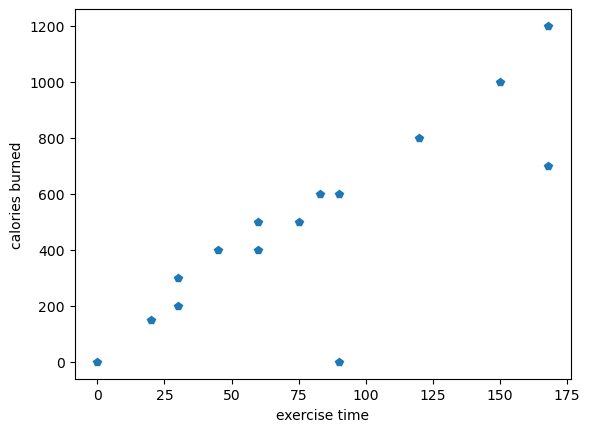

In [5]:
'''
데이터 시각화 (산점도 활용)
운동 시간과 소모 칼로리 관계 (산점도)
X축: exercise_time (운동 시간)
Y축: calories_burned (소모 칼로리)
'''

import matplotlib.pyplot as plt
x = df['exercise_time']
y = df['calories_burned']

plt.xlabel("exercise time")
plt.ylabel("calories burned")

plt.plot(x,y,'p')
plt.show()

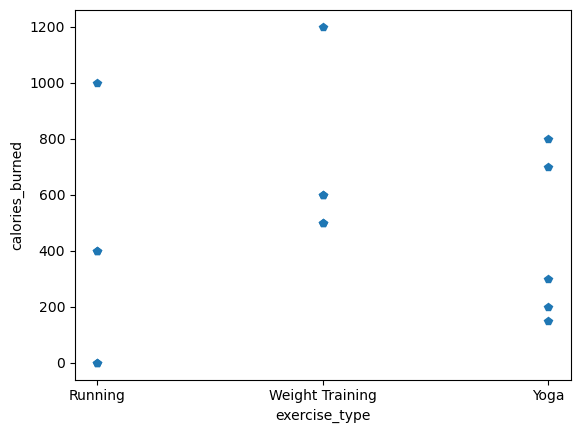

In [6]:
'''
운동 유형과 소모 칼로리 관계 (산점도)
X축: exercise_type (운동 유형, 문자열이므로 변환 필요)
Y축: calories_burned (소모 칼로리)
포인트로 개별 사용자를 시각화하세요.
특정 운동 유형(예: 러닝 vs. 요가 vs. 웨이트 트레이닝)이 더 많은 칼로리를 소모하는지 확인하세요.
'''

x = df['exercise_type']
y = df['calories_burned']

plt.xlabel('exercise_type')
plt.ylabel('calories_burned')

plt.plot(x,y,'p')
plt.show()

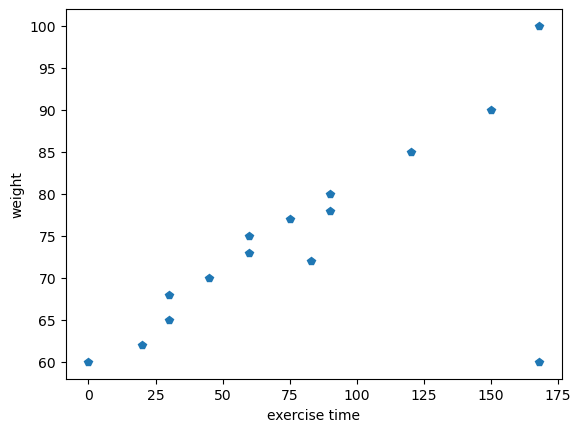

In [7]:
'''
운동 시간과 몸무게 관계 (산점도)
X축: exercise_time (운동 시간)
Y축: weight (몸무게)
운동 시간이 많을수록 몸무게가 줄어드는지 분석하세요.
특정 몸무게 구간에서 운동 시간이 길어지는 경향이 있는지 확인하세요.
'''

x = df['exercise_time']
y = df['weight']

plt.xlabel('exercise time')
plt.ylabel('weight')

plt.plot(x, y, 'p')
plt.show()